In [3]:
import pandas as pd

### Gorkin et al. Biorxiv 2017

In [4]:
df = pd.read_excel('Table_S2_mouse_target_predicitons.xlsx',header=1)

In [5]:
tads = df['tad']

### TADs

##### TADs to bed

In [12]:
tads = set(tads)

In [17]:
tups = []
for i in tads:
    chrom = i.split(':')[0]
    start,stop = i.split(':')[-1].split('-')
    tups.append((chrom,start,stop))

In [19]:
tad_df = pd.DataFrame(tups)

In [20]:
tad_df.to_csv('/home/shared/Data/encode/mouse/TAD_positions_mm10.bed',sep='\t',header=False,index=False)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [37]:
tad_df[1] = tad_df[1].apply(int)
tad_df[2] = tad_df[2].apply(int)

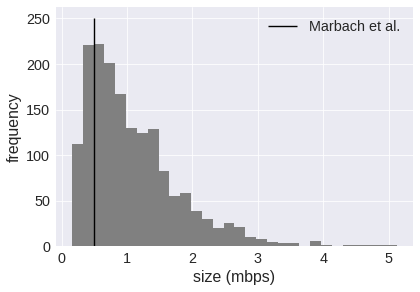

In [530]:
sb.set_context('paper',font_scale=1.8)
plt.hist((tad_df[2]-tad_df[1])/1e6,bins=30,color='grey')
plt.xlabel('size (mbps)')
plt.ylabel('frequency')
plt.vlines(0.5,0,250,label="Marbach et al.")
plt.legend()

In [527]:
plt.vlines?

In [49]:
import numpy as np
np.mean((tad_df[2]-tad_df[1])/1e6)

1.0813705336509827

##### dictionary of TADs

In [82]:
tad_dic = {}
tad_df_sorted = pd.read_csv('/home/shared/Data/encode/mouse/TAD_positions_mm10_sorted.bed',sep='\t',header=None)
for indx,r in enumerate(tad_df_sorted.iterrows()):
    pos = "{}:{}-{}".format(r[1][0],r[1][1],r[1][2])
    tad_dic[pos] = "TAD_{}".format(indx)
    

##### mine enh within TADs

In [70]:
enh_tads = pd.read_csv('/home/shared/Data/encode/mouse/enh_within_TAD.bed',sep='\t',header=None)

In [84]:
tids = []
for r in enh_tads.iterrows():
    pos = "{}:{}-{}".format(r[1][3],r[1][4],r[1][5])
    tids.append(tad_dic[pos])


In [86]:
enh_tads['tids'] = tids

In [88]:
del(enh_tads[3])
del(enh_tads[4])
del(enh_tads[5])

In [89]:
enh_tads_groups = enh_tads.groupby('tids')

In [91]:
tad_enh_counts = enh_tads_groups.count()

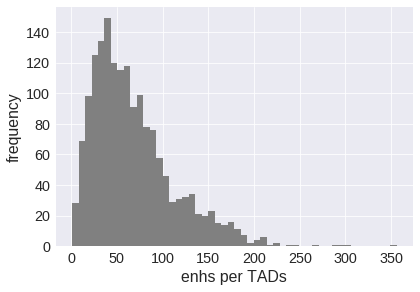

In [98]:
sb.set_context('paper',font_scale=1.8)
plt.hist(tad_enh_counts[0],bins=50,color='grey')
plt.xlabel('enhs per TADs')
plt.ylabel('frequency')

#### mine genes within TADs

In [588]:
gene_tads = pd.read_csv('/home/shared/Data/encode/mouse/pc_within_TAD.bed',sep='\t',header=None)

In [590]:
tids = []
for r in gene_tads.iterrows():
    pos = "{}:{}-{}".format(r[1][6],r[1][7],r[1][8])
    tids.append(tad_dic[pos])


In [592]:
gene_tads['tids'] = tids

In [593]:
del(gene_tads[6])
del(gene_tads[7])
del(gene_tads[8])

In [594]:
gene_tads_groups = gene_tads.groupby('tids')

In [595]:
tad_gene_counts = gene_tads_groups.count()

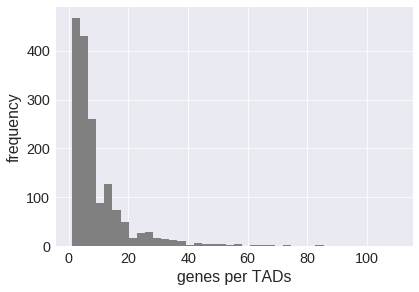

In [600]:
sb.set_context('paper',font_scale=1.8)
plt.hist(tad_gene_counts[0],bins=40,color='grey')
plt.xlabel('genes per TADs')
plt.ylabel('frequency')

##### using all annotations

In [178]:
gencode_mm10 = pd.read_csv('/home/shared/Data/gencode/mouse/mm10/gencode.vM10.annotation.gtf',sep='\t',header=None,skiprows=5)

In [143]:
for g in exp['gene_id']:
    if g in list(gencode_mm10[8]):
        print(g)
        break

In [217]:
eid_to_name = {}
for r in gencode_mm10.iterrows():
    eid = r[1][8].split('gene_id "')[-1].split('";')[0]
    name = r[1][8].split('; gene_name "')[-1].split('";')[0]
    gtype = r[1][8].split('; gene_type "')[-1].split('";')[0]
    pos = '{}:{}-{}'.format(r[1][0],r[1][3],r[1][4])
    strand = r[1][6]
    eid_to_name[eid] = [name,gtype,pos,strand]


In [218]:
annot = pd.DataFrame(eid_to_name)

In [219]:
annot = annot.transpose()

In [226]:
annot_subset = annot.ix[[e in list(exp['gene_id']) for e in annot.index],:]

In [ ]:
annot_subset.groupby(by=1).count()

In [178]:
gencode_mm10 = pd.read_csv('/home/shared/Data/gencode/mouse/mm10/gencode.vM10.annotation.gtf',sep='\t',header=None,skiprows=5)

In [143]:
for g in exp['gene_id']:
    if g in list(gencode_mm10[8]):
        print(g)
        break

In [217]:
eid_to_name = {}
for r in gencode_mm10.iterrows():
    eid = r[1][8].split('gene_id "')[-1].split('";')[0]
    name = r[1][8].split('; gene_name "')[-1].split('";')[0]
    gtype = r[1][8].split('; gene_type "')[-1].split('";')[0]
    pos = '{}:{}-{}'.format(r[1][0],r[1][3],r[1][4])
    strand = r[1][6]
    eid_to_name[eid] = [name,gtype,pos,strand]


In [218]:
annot = pd.DataFrame(eid_to_name)

In [219]:
annot = annot.transpose()

In [226]:
annot_subset = annot.ix[[e in list(exp['gene_id']) for e in annot.index],:]

#### only protein coding

In [559]:
gencode_m4 = pd.read_csv('/home/shared/Data/gencode/mouse/M4/protein_coding.gtf',sep='\t',header=None)

In [560]:
eid_to_name = {}
for indx,r in enumerate(gencode_m4.iterrows()):
    eid = r[1][8].split('gene_id "')[-1].split('";')[0]
    name = r[1][8].split('; gene_name "')[-1].split('";')[0]
    gtype = r[1][8].split('; gene_type "')[-1].split('";')[0]
    pos = '{}:{}-{}'.format(r[1][0],r[1][3],r[1][4])
    strand = r[1][6]
    eid_to_name[eid] = [name,gtype,pos,strand,indx]


In [355]:
annot = pd.DataFrame(eid_to_name)

In [356]:
annot = annot.transpose()

In [357]:
annot_subset = annot.ix[[e in list(exp['gene_id']) for e in annot.index],:]

In [358]:
annot_subset.groupby(by=1).count()

,0,2,3
1,,,
protein_coding,22032,22032,22032


##### expression data

In [540]:
exp = pd.read_csv('/home/shared/Data/encode/mouse/gene_expression_log2TPM_signal_matrix.txt',sep='\t')

In [541]:
tissue_of_interest = ['lung','kidney','stomach','intestine','embryonic-facial-prominence','neural-tube','limb','midbrain','forebrain','liver','hindbrain','heart']
time = ['P0','e11.5','e12.5','e13.5','e14.5','e15.5','e16.5']

In [542]:
exp.set_index('gene_id',inplace=True)

In [543]:
exp = exp.ix[:,[any(st in c for st in tissue_of_interest) and any(t in c for t in time) for c in exp.columns]]

In [544]:
exp.reset_index(inplace=True)

In [545]:
count = 0
pos_tup = []
eid_name_tup = []
tup = []
for g in exp['gene_id']:
    if g in eid_to_name.keys():
        tup.append((eid_to_name[g][0],g))

In [546]:
eid_gene = pd.DataFrame(tup)

In [547]:
exp_pc = exp.ix[[g in list(eid_gene[1]) for g in exp['gene_id']],:]

In [548]:
exp_pc.reset_index(drop=True,inplace=True)

In [549]:
exp_pc['name'] = list(eid_gene[0])

/home/vamin/softwares/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [420]:
del(exp_pc['gene_id'])

In [550]:
exp_pc_df = exp_pc.set_index('name')

In [551]:
exp_pc_df = exp_pc_df[~exp_pc_df.index.duplicated()]

In [423]:
exp_pc_df_corr = exp_pc_df.corr()

In [432]:
exp_pc_df_corr.index

Index(['midbrain_e16.5_mixed_1_RNA-seq_ENCFF064JRU',
       'kidney_P0_unknown_2_RNA-seq_ENCFF783LVC',
       'heart_e11.5_mixed_1_RNA-seq_ENCFF226IWR',
       'lung_e16.5_mixed_2_RNA-seq_ENCFF248XSK',
       'neural-tube_e13.5_mixed_2_RNA-seq_ENCFF447KKS',
       'stomach_P0_unknown_1_RNA-seq_ENCFF517XLT',
       'intestine_P0_unknown_2_RNA-seq_ENCFF795XBQ',
       'heart_e13.5_mixed_2_RNA-seq_ENCFF708WLN',
       'heart_P0_mixed_2_RNA-seq_ENCFF982MTC',
       'forebrain_P0_unknown_1_RNA-seq_ENCFF918QNL',
       ...
       'liver_e14.5_mixed_1_RNA-seq_ENCFF793MPX',
       'limb_e13.5_mixed_1_RNA-seq_ENCFF358WYS',
       'limb_e12.5_mixed_2_RNA-seq_ENCFF820ZSB',
       'intestine_e16.5_mixed_1_RNA-seq_ENCFF658OKS',
       'midbrain_e13.5_mixed_2_RNA-seq_ENCFF053VPP',
       'limb_e14.5_mixed_1_RNA-seq_ENCFF372QBT',
       'forebrain_P0_mixed_1_RNA-seq_ENCFF976DIF',
       'forebrain_P0_mixed_2_RNA-seq_ENCFF434WEQ',
       'midbrain_e12.5_mixed_1_RNA-seq_ENCFF912PDM',
       'heart_P0_u

In [433]:
tissue_col = []
for s in exp_pc_df_corr.columns:
    tissue_col.append(s.split('_')[0])
time_row = []
for s in exp_pc_df_corr.index:
    time_row.append(s.split('_')[1])
    

In [434]:
import matplotlib

def get_color(arr, color = 'jet'):
    cmap = matplotlib.cm.get_cmap(color,len(set(arr)))
    out_arr = []
    for val in arr:
        if val is None:
            out_arr.append('black')
        else:
            out_arr.append(cmap(val))
    return(out_arr)

In [435]:
tissue_zip = zip(set(tissue_col),range(0,len(set(tissue_col))))
time_zip = zip(set(time_row),range(0,len(set(time_row))))

In [436]:
tissue_num = {}
for v in list(tissue_zip):
    tissue_num[v[0]] = v[1]
time_num = {}
for v in list(time_zip):
    time_num[v[0]] = v[1]

In [437]:
tissue_col_value = []
for t in tissue_col:
    tissue_col_value.append(tissue_num[t])
    
time_row_value = []
for t in time_row:
    time_row_value.append(time_num[t])

In [520]:
times = ["P0","e11.5","e12.5","e13.5","e14.5","e15.5","e16.5"]
tissues = ["embryonic-facial-prominence","midbrain","forebrain","hindbrain","neural-tube","kidney","lung","liver","intestine","stomach","heart","limb"]

In [521]:
col_pal = sb.color_palette("hls",len(set(tissue_col)))
row_pal = sb.color_palette("BuGn_r",len(set(time_row)))

In [522]:
col_lut = dict(zip(map(str,tissues),col_pal))
row_lut = dict(zip(map(str,times),row_pal))

In [523]:
col_color_bar = [col_lut[l] for l in tissue_col]
row_color_bar = [row_lut[l] for l in time_row]

/home/vamin/softwares/anaconda2/envs/py34/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


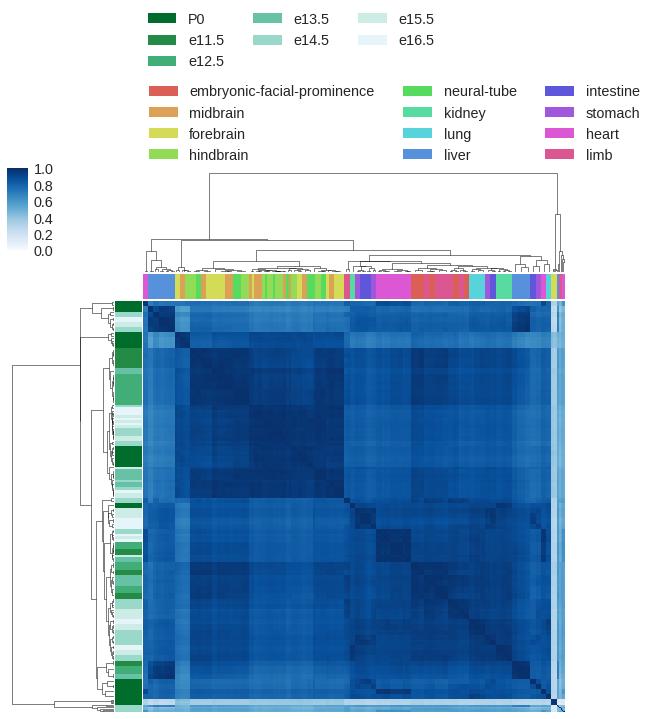

In [524]:
exp_clust = sb.clustermap(exp_pc_df.corr(),col_colors=col_color_bar,row_colors=row_color_bar,vmin=0,vmax=1,xticklabels=False,yticklabels=False,cmap='Blues')
for label in tissues:
    exp_clust.ax_col_dendrogram.bar(0,0,color=col_lut[label],label=label,linewidth=0)
for label in times:
    exp_clust.ax_row_dendrogram.bar(0,0,color=row_lut[label],label=label,linewidth=0)
exp_clust.ax_col_dendrogram.legend(loc=(0,1),ncol=3)
exp_clust.ax_row_dendrogram.legend(loc=(1.26,1.55),ncol=3)
    

In [431]:
exp_clust.data2d

,heart_P0_mixed_1_RNA-seq_ENCFF799NMY,heart_P0_mixed_1_RNA-seq_ENCFF319BKS,heart_P0_mixed_2_RNA-seq_ENCFF982MTC,heart_P0_mixed_2_RNA-seq_ENCFF259NEX,liver_P0_unknown_1_RNA-seq_ENCFF872PTK,liver_P0_unknown_1_RNA-seq_ENCFF875HIA,liver_P0_unknown_2_RNA-seq_ENCFF143HKK,liver_P0_unknown_2_RNA-seq_ENCFF122YPQ,liver_e14.5_mixed_2_RNA-seq_ENCFF207YGU,liver_e14.5_mixed_2_RNA-seq_ENCFF093WUY,...,forebrain_P0_mixed_1_RNA-seq_ENCFF569ODO,forebrain_P0_mixed_1_RNA-seq_ENCFF863BCB,forebrain_P0_mixed_2_RNA-seq_ENCFF250DXJ,forebrain_P0_mixed_2_RNA-seq_ENCFF434WEQ,liver_e14.5_mixed_2_RNA-seq_ENCFF668RJN,liver_e14.5_mixed_1_RNA-seq_ENCFF993NNK,limb_e14.5_mixed_2_RNA-seq_ENCFF026IQF,limb_e14.5_mixed_1_RNA-seq_ENCFF892XES,heart_e14.5_mixed_1_RNA-seq_ENCFF662WLV,heart_e14.5_mixed_2_RNA-seq_ENCFF705YYN
heart_P0_mixed_1_RNA-seq_ENCFF799NMY,1.000000,0.999996,0.964644,0.964645,0.707520,0.707525,0.709943,0.709906,0.763155,0.763126,...,0.341765,0.322722,0.309480,0.328061,0.525308,0.551686,0.465410,0.490661,0.621620,0.619241
heart_P0_mixed_1_RNA-seq_ENCFF319BKS,0.999996,1.000000,0.964654,0.964654,0.707564,0.707570,0.709985,0.709947,0.763184,0.763152,...,0.341875,0.322848,0.309620,0.328187,0.525338,0.551715,0.465478,0.490698,0.621594,0.619252
heart_P0_mixed_2_RNA-seq_ENCFF982MTC,0.964644,0.964654,1.000000,0.999997,0.703534,0.703554,0.705729,0.705697,0.754696,0.754675,...,0.333964,0.316583,0.302808,0.319676,0.516824,0.545454,0.457420,0.484370,0.613802,0.612324
heart_P0_mixed_2_RNA-seq_ENCFF259NEX,0.964645,0.964654,0.999997,1.000000,0.703498,0.703517,0.705697,0.705666,0.754660,0.754641,...,0.333876,0.316472,0.302681,0.319573,0.516782,0.545430,0.457364,0.484293,0.613816,0.612310
liver_P0_unknown_1_RNA-seq_ENCFF872PTK,0.707520,0.707564,0.703534,0.703498,1.000000,0.999995,0.995652,0.995660,0.896533,0.896558,...,0.266952,0.265726,0.249443,0.250283,0.622166,0.622601,0.383475,0.421944,0.471386,0.454082
liver_P0_unknown_1_RNA-seq_ENCFF875HIA,0.707525,0.707570,0.703554,0.703517,0.999995,1.000000,0.995651,0.995656,0.896543,0.896569,...,0.266975,0.265744,0.249454,0.250303,0.622154,0.622638,0.383523,0.421924,0.471384,0.454110
liver_P0_unknown_2_RNA-seq_ENCFF143HKK,0.709943,0.709985,0.705729,0.705697,0.995652,0.995651,1.000000,0.999982,0.890993,0.891010,...,0.267893,0.266726,0.249615,0.250357,0.614521,0.615412,0.378304,0.414902,0.469908,0.453245
liver_P0_unknown_2_RNA-seq_ENCFF122YPQ,0.709906,0.709947,0.705697,0.705666,0.995660,0.995656,0.999982,1.000000,0.890965,0.890981,...,0.267864,0.266697,0.249593,0.250335,0.614500,0.615397,0.378262,0.414907,0.469879,0.453205
liver_e14.5_mixed_2_RNA-seq_ENCFF207YGU,0.763155,0.763184,0.754696,0.754660,0.896533,0.896543,0.890993,0.890965,1.000000,0.999988,...,0.303230,0.296044,0.279300,0.286105,0.676772,0.704910,0.438437,0.472727,0.506781,0.500796
liver_e14.5_mixed_2_RNA-seq_ENCFF093WUY,0.763126,0.763152,0.754675,0.754641,0.896558,0.896569,0.891010,0.890981,0.999988,1.000000,...,0.303123,0.295929,0.279189,0.285999,0.676805,0.704922,0.438427,0.472758,0.506809,0.500774


In [562]:
filter_r = []
for e in exp_pc_df['gene_id']:
    filter_r.append(eid_to_name[e][-1])

In [566]:
m4_dups_filter = gencode_m4.ix[filter_r,:]

In [568]:
m4_dups_filter.reset_index(drop=True,inplace=True)

In [572]:
m4_dups_filter.to_csv('/home/shared/Data/gencode/mouse/M4/protein_coding_filtered.gtf',sep='\t',index=None,header=None,columns=None)

In [574]:
m4_dups_filter_bed = m4_dups_filter[[0,3,4,8,5,6]]

In [576]:
gname = []
for r in m4_dups_filter_bed.iterrows():
    name = r[1][8].split('; gene_name "')[-1].split('";')[0]
    gname.append(name)

In [578]:
m4_dups_filter_bed[8] = gname

/home/vamin/softwares/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [584]:
m4_dups_filter_bed.to_csv('/home/shared/Data/encode/mouse/m4_protein_coding_genes.bed',sep='\t',index=None,header=None)

## Scratch

In [4]:
import pandas as pd
A = pd.DataFrame(0,index=['A','B','C','D','E','F'],columns=['i','j','k','l','m'])

In [6]:
import numpy as np

In [7]:

a_s = pd.DataFrame(np.random.sample(size=(2,3)))

In [9]:
a_s.index = ['C','D']
a_s.columns = ['i','k','m']

In [16]:
a_s_dic = a_s.to_dict()

In [22]:
for c in a_s_dic.keys():
    for r in a_s_dic[c].keys():
        A_dic[c][r] = a_s_dic[c][r]

In [23]:
pd.DataFrame(A_dic)

,i,j,k,l,m
A,0.000000,0,0.000000,0,0.000000
B,0.000000,0,0.000000,0,0.000000
C,0.191232,0,0.437150,0,0.180949
D,0.721946,0,0.851488,0,0.696960
E,0.000000,0,0.000000,0,0.000000
F,0.000000,0,0.000000,0,0.000000


In [17]:
A_dic = A.to_dict()